In [2]:
import os
import json
import pandas as pd
from docx import Document

In [3]:
data_folder = '/home/hashim/Flight-Delay-Time-Prediction-using-Ensemble-Learning/data'

flight_data = []

def extract_data_from_docx(file_path):
    doc = Document(file_path)
    content = ''
    
    for para in doc.paragraphs:
        content += para.text
    
    try:
        flight_records = json.loads(content)
        return flight_records
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON data in {file_path}: {e}")
        return None

In [4]:
for file_name in os.listdir(data_folder):
    if file_name.endswith('.docx'):
        file_path = os.path.join(data_folder, file_name)
        flight_records = extract_data_from_docx(file_path)
        
        if flight_records:
            flight_data.extend(flight_records)  


df = pd.json_normalize(flight_data, sep='_')

In [5]:
df

,type,status,departure_iataCode,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,codeshared_flight_icaoNumber,departure_terminal,departure_gate,arrival_baggage,arrival_gate,arrival_estimatedTime,arrival_delay,arrival_actualTime,arrival_estimatedRunway,arrival_actualRunway
0,departure,active,isb,opis,26.0,2024-03-16t05:55:00.000,2024-03-16t05:05:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,isb,opis,NaN,2024-03-16t06:05:00.000,2024-03-16t06:05:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,...,thy711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,isb,opis,NaN,2024-03-16t06:50:00.000,2024-03-16t06:50:00.000,NaN,NaN,NaN,...,NaN,t1,b3,a03,21a,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81387,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,qtr633,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81388,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,qtr633,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81389,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,NaN,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81390,departure,active,isb,opis,15.0,2023-11-01t04:15:00.000,2023-11-01t04:30:00.000,NaN,NaN,NaN,...,etd232,NaN,b3,NaN,71,NaN,NaN,NaN,NaN,NaN


In [6]:
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    print(f"Missing values in {column}: {count}")

Missing values in type: 0
Missing values in status: 0
Missing values in departure_iataCode: 0
Missing values in departure_icaoCode: 0
Missing values in departure_delay: 28867
Missing values in departure_scheduledTime: 0
Missing values in departure_estimatedTime: 11024
Missing values in departure_actualTime: 33130
Missing values in departure_estimatedRunway: 33130
Missing values in departure_actualRunway: 33130
Missing values in arrival_iataCode: 0
Missing values in arrival_icaoCode: 0
Missing values in arrival_terminal: 48596
Missing values in arrival_scheduledTime: 0
Missing values in airline_name: 0
Missing values in airline_iataCode: 0
Missing values in airline_icaoCode: 0
Missing values in flight_number: 0
Missing values in flight_iataNumber: 0
Missing values in flight_icaoNumber: 0
Missing values in codeshared_airline_name: 56312
Missing values in codeshared_airline_iataCode: 56312
Missing values in codeshared_airline_icaoCode: 56312
Missing values in codeshared_flight_number: 563

## How do we handle missing values?
We should remove all rows which have departure_delay as null. Since that is our target variable, it should not be imputed since it can introduce a bias.
Sources: https://www.nature.com/articles/s43856-023-00356-z
https://stackoverflow.com/questions/73644442/missing-value-in-target-variable#:~:text=1%20Answer&text=Target%20variable%20is%20not%20advised,how%20the%20learning%20algorithm%20learns.

In [7]:
#drop all rows with missing values of column depature_delay
df = df.dropna(subset=['departure_delay'])
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    print(f"Missing values in {column}: {count}")

Missing values in type: 0
Missing values in status: 0
Missing values in departure_iataCode: 0
Missing values in departure_icaoCode: 0
Missing values in departure_delay: 0
Missing values in departure_scheduledTime: 0
Missing values in departure_estimatedTime: 1476
Missing values in departure_actualTime: 11040
Missing values in departure_estimatedRunway: 11040
Missing values in departure_actualRunway: 11040
Missing values in arrival_iataCode: 0
Missing values in arrival_icaoCode: 0
Missing values in arrival_terminal: 29916
Missing values in arrival_scheduledTime: 0
Missing values in airline_name: 0
Missing values in airline_iataCode: 0
Missing values in airline_icaoCode: 0
Missing values in flight_number: 0
Missing values in flight_iataNumber: 0
Missing values in flight_icaoNumber: 0
Missing values in codeshared_airline_name: 35005
Missing values in codeshared_airline_iataCode: 35005
Missing values in codeshared_airline_icaoCode: 35005
Missing values in codeshared_flight_number: 35005
Mi

In [8]:
df

,type,status,departure_iataCode,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,codeshared_flight_icaoNumber,departure_terminal,departure_gate,arrival_baggage,arrival_gate,arrival_estimatedTime,arrival_delay,arrival_actualTime,arrival_estimatedRunway,arrival_actualRunway
0,departure,active,isb,opis,26.0,2024-03-16t05:55:00.000,2024-03-16t05:05:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,...,thy711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,departure,active,isb,opis,2.0,2024-03-16t10:55:00.000,2024-03-16t10:30:00.000,2024-03-16t10:57:00.000,2024-03-16t10:57:00.000,2024-03-16t10:57:00.000,...,NaN,NaN,NaN,NaN,NaN,2024-03-16t14:29:00.000,NaN,NaN,NaN,NaN
23,departure,active,isb,opis,16.0,2024-03-16t11:00:00.000,2024-03-16t11:00:00.000,2024-03-16t11:15:00.000,2024-03-16t11:15:00.000,2024-03-16t11:15:00.000,...,NaN,NaN,NaN,NaN,d49,2024-03-16t13:36:00.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81387,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,qtr633,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81388,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,qtr633,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81389,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,NaN,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81390,departure,active,isb,opis,15.0,2023-11-01t04:15:00.000,2023-11-01t04:30:00.000,NaN,NaN,NaN,...,etd232,NaN,b3,NaN,71,NaN,NaN,NaN,NaN,NaN


Missing values in type: 0 -> No need to removed 
Missing values in status: 0 -> No need to be removed
Missing values in departure_iataCode: 0-> No need to removed 
Missing values in departure_icaoCode: 0-> No need to removed 
Missing values in departure_delay: 0-> No need to removed 
Missing values in departure_scheduledTime: 0-> No need to removed 
Missing values in departure_estimatedTime: 1476 -> Imputation
Missing values in departure_actualTime: 11040 -> Imputation
Missing values in departure_estimatedRunway: 11040 -> Imputation
Missing values in departure_actualRunway: 11040 -> Imputation
Missing values in arrival_iataCode: 0-> No need to removed 
Missing values in arrival_icaoCode: 0-> No need to removed 
Missing values in arrival_terminal: 29916 -> Too many missing values , should be removed
Missing values in arrival_scheduledTime: 0-> No need to removed  
Missing values in airline_name: 0-> No need to removed 
Missing values in airline_iataCode: 0-> No need to removed 
Missing values in airline_icaoCode: 0-> No need to removed 
Missing values in flight_number: 0-> No need to removed 
Missing values in flight_iataNumber: 0-> No need to removed 
Missing values in flight_icaoNumber: 0-> No need to removed 
Missing values in codeshared_airline_name: 35005-> Too many missing values , should be removed
Missing values in codeshared_airline_iataCode: 35005-> Too many missing values , should be removed
Missing values in codeshared_airline_icaoCode: 35005-> Too many missing values , should be removed
Missing values in codeshared_flight_number: 35005-> Too many missing values , should be removed
Missing values in codeshared_flight_iataNumber: 35005-> Too many missing values , should be removed
Missing values in codeshared_flight_icaoNumber: 35005-> Too many missing values , should be removed
Missing values in departure_terminal: 20147-> Too many missing values , should be removed
Missing values in departure_gate: 48813-> Too many missing values , should be removed
Missing values in arrival_baggage: 32271-> Too many missing values , should be removed
Missing values in arrival_gate: 48720-> Too many missing values , should be removed
Missing values in arrival_estimatedTime: 12086-> Too many missing values , should be removed
Missing values in arrival_delay: 43846-> Too many missing values , should be removed
Missing values in arrival_actualTime: 52504-> Too many missing values , should be removed
Missing values in arrival_estimatedRunway: 52504-> Too many missing values , should be removed
Missing values in arrival_actualRunway: 52504-> Too many missing values , should be removed

In [9]:
columns_to_remove_due_to_missing_values = [
    'arrival_terminal', 'codeshared_airline_name', 'codeshared_airline_iataCode',
    'codeshared_airline_icaoCode', 'codeshared_flight_number', 'codeshared_flight_iataNumber',
    'codeshared_flight_icaoNumber', 'departure_terminal', 'departure_gate', 'arrival_baggage',
    'arrival_gate', 'arrival_estimatedTime', 'arrival_delay', 'arrival_actualTime',
    'arrival_estimatedRunway', 'arrival_actualRunway'
]


df.drop(columns=columns_to_remove_due_to_missing_values, inplace=True)

missing_values = df.isnull().sum()
for column, count in missing_values.items():
    percentage = (count / len(df)) * 100
    print(f"Missing values in {column}: {count} ({percentage:.2f}%)")

Missing values in type: 0 (0.00%)
Missing values in status: 0 (0.00%)
Missing values in departure_iataCode: 0 (0.00%)
Missing values in departure_icaoCode: 0 (0.00%)
Missing values in departure_delay: 0 (0.00%)
Missing values in departure_scheduledTime: 0 (0.00%)
Missing values in departure_estimatedTime: 1476 (2.81%)
Missing values in departure_actualTime: 11040 (21.02%)
Missing values in departure_estimatedRunway: 11040 (21.02%)
Missing values in departure_actualRunway: 11040 (21.02%)
Missing values in arrival_iataCode: 0 (0.00%)
Missing values in arrival_icaoCode: 0 (0.00%)
Missing values in arrival_scheduledTime: 0 (0.00%)
Missing values in airline_name: 0 (0.00%)
Missing values in airline_iataCode: 0 (0.00%)
Missing values in airline_icaoCode: 0 (0.00%)
Missing values in flight_number: 0 (0.00%)
Missing values in flight_iataNumber: 0 (0.00%)
Missing values in flight_icaoNumber: 0 (0.00%)


/tmp/ipykernel_155027/1935960071.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_remove_due_to_missing_values, inplace=True)


In [10]:
df['departure_estimatedTime'] = df['departure_estimatedTime'].fillna(
    pd.to_datetime(df['departure_scheduledTime']) + pd.to_timedelta(df['departure_delay'], unit='minutes')
)
#Reasoning: The departure_estimatedTime is generally calculated by adding the departure_delay to the departure_scheduledTime.

/tmp/ipykernel_155027/1016357705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_estimatedTime'] = df['departure_estimatedTime'].fillna(


In [11]:
df['departure_actualTime'] = df['departure_actualTime'].fillna(df['departure_estimatedTime'])
#Reasoning: When the departure_actualTime is missing, the best available estimate is the departure_estimatedTime, as it reflects the most recent expected departure time.

/tmp/ipykernel_155027/762327965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_actualTime'] = df['departure_actualTime'].fillna(df['departure_estimatedTime'])


In [12]:
df['departure_estimatedRunway'] = df['departure_estimatedRunway'].fillna(df['departure_estimatedTime'])
#In many cases, the departure_estimatedRunway is either the same as the departure_estimatedTime or differs by a minimal amount, which is often negligible for analysis purposes.

/tmp/ipykernel_155027/1952736492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_estimatedRunway'] = df['departure_estimatedRunway'].fillna(df['departure_estimatedTime'])


In [13]:
df['departure_actualRunway'] = df['departure_actualRunway'].fillna(df['departure_actualTime'])
##Reasoning: Similarly, the departure_actualRunway is often the same as the departure_actualTime. When actual runway times are missing, using the actual departure time is the most reasonable estimate.

/tmp/ipykernel_155027/3619214402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_actualRunway'] = df['departure_actualRunway'].fillna(df['departure_actualTime'])


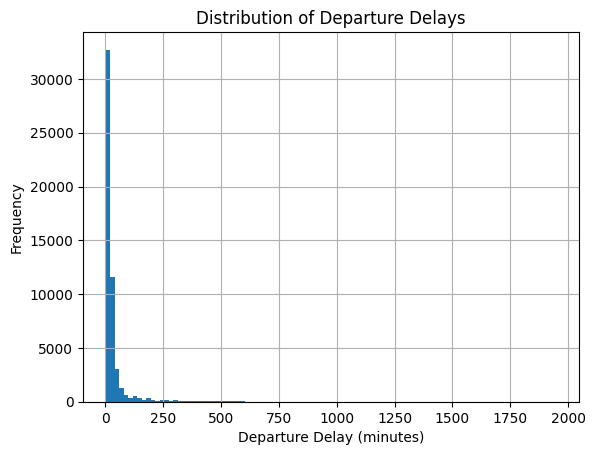

In [14]:
import matplotlib.pyplot as plt
df['departure_delay'].hist(bins=100)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delays')
plt.show()

This shows that the standard binning will not work well.

In [15]:
import numpy as np

# Define cumulative percentages
percentiles = [0, 5, 12.5, 25, 40, 60, 75, 90, 100]

# Calculate the departure_delay values at these percentiles
bin_edges = np.percentile(df['departure_delay'], percentiles)
# Add epsilon to ensure unique bin edges
epsilon = 1e-6
bin_edges = np.unique(bin_edges + np.arange(len(bin_edges)) * epsilon)
# Create labels for bins if desired
labels = [f'Bin{i+1}' for i in range(len(bin_edges)-1)]

# Bin the departure_delay data
df['departure_delay_bin'] = pd.cut(
    df['departure_delay'],
    bins=bin_edges,
    labels=labels,
    include_lowest=True
)
# Check the distribution of data across bins
bin_counts = df['departure_delay_bin'].value_counts().sort_index()
print(bin_counts)


departure_delay_bin
Bin1     3407
Bin2     4346
Bin3     5399
Bin4     8726
Bin5    10836
Bin6     7129
Bin7     7434
Bin8     5248
Name: count, dtype: int64


/tmp/ipykernel_155027/2791781437.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_delay_bin'] = pd.cut(


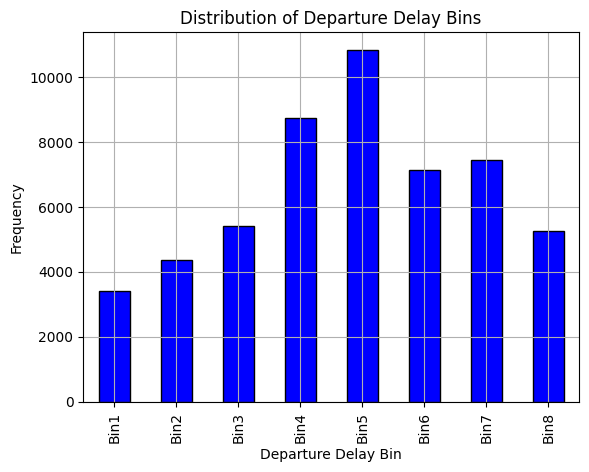

In [16]:
# plot a graph for how many values are in each bin for departure_delay_bin
bin_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Departure Delay Bin')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delay Bins')
plt.grid(True)
plt.show()

In [17]:
#drop the column departure_delay
df.drop(columns=['departure_delay'], inplace=True)
df

/tmp/ipykernel_155027/627685292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['departure_delay'], inplace=True)


,type,status,departure_iataCode,departure_icaoCode,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,arrival_iataCode,arrival_icaoCode,arrival_scheduledTime,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_delay_bin
0,departure,active,isb,opis,2024-03-16t05:55:00.000,2024-03-16t05:05:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,jed,oejn,2024-03-16t09:25:00.000,airsial,pf,sif,718,pf718,sif718,Bin6
2,departure,active,isb,opis,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,2024-03-16t06:35:00.000,2024-03-16t06:35:00.000,2024-03-16t06:35:00.000,ist,ltfm,2024-03-16t11:20:00.000,pakistan international airlines,pk,pia,5711,pk5711,pia5711,Bin4
3,departure,active,isb,opis,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,2024-03-16t06:35:00.000,2024-03-16t06:35:00.000,2024-03-16t06:35:00.000,ist,ltfm,2024-03-16t11:20:00.000,turkish airlines,tk,thy,711,tk711,thy711,Bin4
22,departure,active,isb,opis,2024-03-16t10:55:00.000,2024-03-16t10:30:00.000,2024-03-16t10:57:00.000,2024-03-16t10:57:00.000,2024-03-16t10:57:00.000,jed,oejn,2024-03-16t14:30:00.000,serene air,er,sep,801,er801,sep801,Bin1
23,departure,active,isb,opis,2024-03-16t11:00:00.000,2024-03-16t11:00:00.000,2024-03-16t11:15:00.000,2024-03-16t11:15:00.000,2024-03-16t11:15:00.000,auh,omaa,2024-03-16t13:50:00.000,airblue,pa,abq,230,pa230,abq230,Bin5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81387,departure,active,isb,opis,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,doh,othh,2023-11-01t05:20:00.000,rwandair,wb,rwd,1572,wb1572,rwd1572,Bin4
81388,departure,active,isb,opis,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,doh,othh,2023-11-01t05:20:00.000,iberia,ib,ibe,7917,ib7917,ibe7917,Bin4
81389,departure,active,isb,opis,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,doh,othh,2023-11-01t05:20:00.000,qatar airways,qr,qtr,633,qr633,qtr633,Bin4
81390,departure,active,isb,opis,2023-11-01t04:15:00.000,2023-11-01t04:30:00.000,2023-11-01t04:30:00.000,2023-11-01t04:30:00.000,2023-11-01t04:30:00.000,auh,omaa,2023-11-01t06:55:00.000,klm,kl,klm,3930,kl3930,klm3930,Bin5


In [18]:
# List of date columns
date_columns = [
    'departure_scheduledTime', 'departure_estimatedTime', 'departure_actualTime',
    'departure_estimatedRunway', 'departure_actualRunway', 'arrival_scheduledTime'
]

# Convert to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

/tmp/ipykernel_155027/2767713737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_155027/2767713737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_155027/2767713737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [19]:
# Example for departure_scheduledTime
df['departure_hour'] = df['departure_scheduledTime'].dt.hour
df['departure_day'] = df['departure_scheduledTime'].dt.day
df['departure_month'] = df['departure_scheduledTime'].dt.month
df['departure_dayofweek'] = df['departure_scheduledTime'].dt.dayofweek  # Monday=0, Sunday=6

# Similarly for arrival_scheduledTime
df['arrival_hour'] = df['arrival_scheduledTime'].dt.hour
df['arrival_day'] = df['arrival_scheduledTime'].dt.day
df['arrival_month'] = df['arrival_scheduledTime'].dt.month
df['arrival_dayofweek'] = df['arrival_scheduledTime'].dt.dayofweek

/tmp/ipykernel_155027/1736957969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_hour'] = df['departure_scheduledTime'].dt.hour
/tmp/ipykernel_155027/1736957969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_day'] = df['departure_scheduledTime'].dt.day
/tmp/ipykernel_155027/1736957969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [20]:
df['estimated_delay'] = (
    df['departure_estimatedTime'] - df['departure_scheduledTime']
).dt.total_seconds() / 60  # Convert to minutes
df['actual_delay'] = (
    df['departure_actualTime'] - df['departure_scheduledTime']
).dt.total_seconds() / 60

/tmp/ipykernel_155027/33572285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['estimated_delay'] = (
/tmp/ipykernel_155027/33572285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_delay'] = (


In [21]:
categorical_features = [
    'type', 'status', 'departure_iataCode', 'departure_icaoCode',
    'arrival_iataCode', 'arrival_icaoCode', 'airline_name',
    'airline_iataCode', 'airline_icaoCode', 'flight_number',
    'flight_iataNumber', 'flight_icaoNumber'
]
# Encode categorical variables using Label Encoding or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

for col in categorical_features:
    df[col] = le.fit_transform(df[col])

/tmp/ipykernel_155027/1919636544.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_155027/1919636544.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipykernel_155027/1919636544.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [22]:
# Define the target variable
y = df['departure_delay_bin']

# Define the feature matrix
# Exclude target and any non-feature columns
features_to_exclude = [
    'departure_delay_bin', 'departure_scheduledTime', 'departure_estimatedTime',
    'departure_actualTime', 'departure_estimatedRunway', 'departure_actualRunway',
    'arrival_scheduledTime'
]

X = df.drop(columns=features_to_exclude)

In [23]:
from sklearn.model_selection import train_test_split

# Split data (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

        Bin1       0.93      0.92      0.93       681
        Bin2       0.87      0.89      0.88       869
        Bin3       0.90      0.87      0.89      1080
        Bin4       0.91      0.95      0.93      1745
        Bin5       0.96      0.95      0.96      2167
        Bin6       0.98      0.95      0.96      1426
        Bin7       0.99      0.98      0.99      1487
        Bin8       1.00      0.99      0.99      1050

    accuracy                           0.94     10505
   macro avg       0.94      0.94      0.94     10505
weighted avg       0.95      0.94      0.94     10505



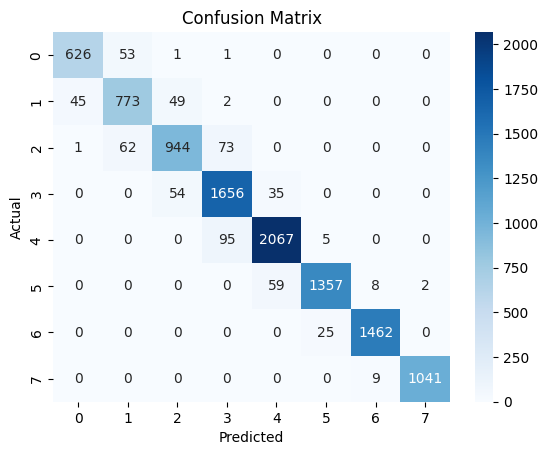

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test data
y_pred = rf_classifier.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


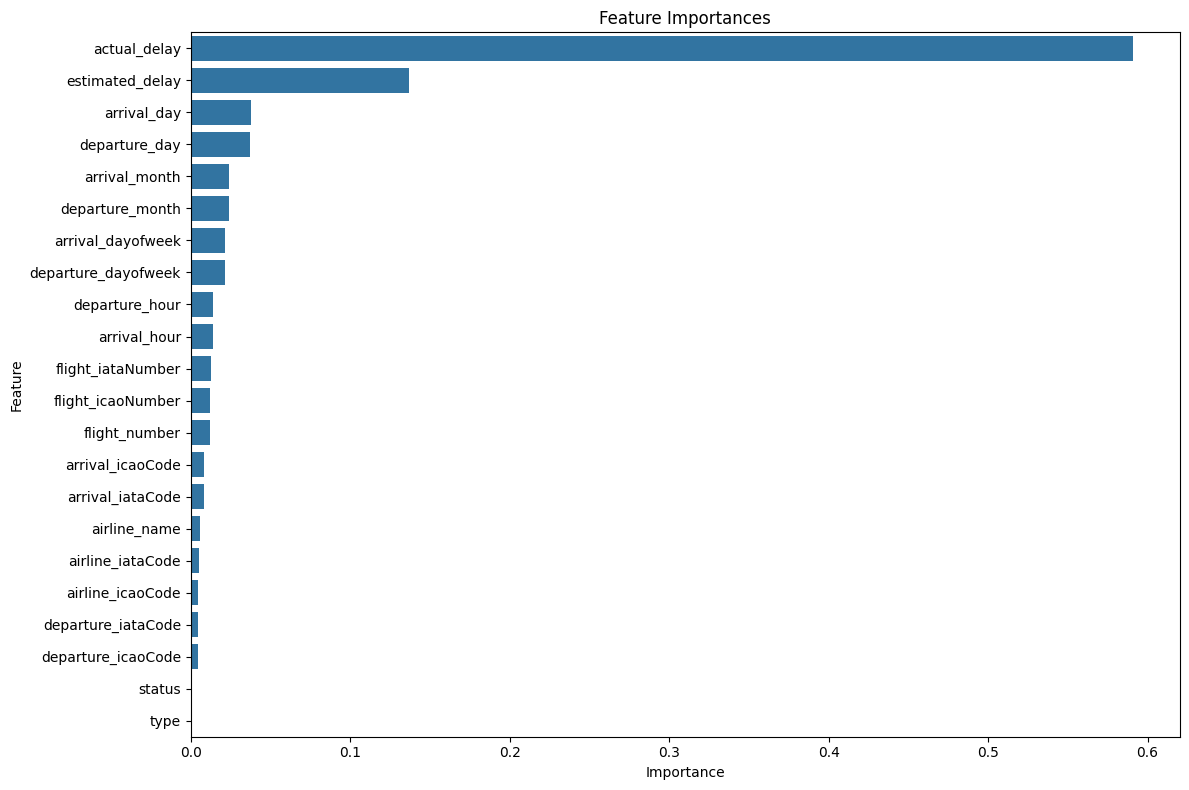

In [26]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00327-4
Selecting critical features for data classification based on machine learning methods"
This paper discusses the importance of feature selection in machine learning, emphasizing that eliminating unimportant variables can improve classification accuracy and performance. The authors highlight that using methods like Random Forest for feature selection can lead to simpler models that generalize better, thereby reducing overfitting and enhancing model interpretability. The study demonstrates that models trained with selected features outperform those trained with all features, especially in high-dimensional datasets

In [27]:
# keep the top 10 features in the dataframe df
top_features = feature_importances['Feature'][:10]
df = df[['departure_delay_bin'] + list(top_features)]
df

,departure_delay_bin,actual_delay,estimated_delay,arrival_day,departure_day,arrival_month,departure_month,arrival_dayofweek,departure_dayofweek,departure_hour,arrival_hour
0,Bin6,25.0,-50.0,16,16,3,3,5,5,5,9
2,Bin4,10.0,10.0,16,16,3,3,5,5,6,11
3,Bin4,10.0,10.0,16,16,3,3,5,5,6,11
22,Bin1,2.0,-25.0,16,16,3,3,5,5,10,14
23,Bin5,15.0,0.0,16,16,3,3,5,5,11,13
...,...,...,...,...,...,...,...,...,...,...,...
81387,Bin4,12.0,0.0,1,1,11,11,2,2,3,5
81388,Bin4,12.0,0.0,1,1,11,11,2,2,3,5
81389,Bin4,12.0,0.0,1,1,11,11,2,2,3,5
81390,Bin5,15.0,15.0,1,1,11,11,2,2,4,6


In [28]:
import numpy as np

class MultiKernelSVM:
    """
    A Support Vector Machine classifier with multiple kernel support implemented from scratch.
    This classifier allows the combination of multiple kernels (e.g., linear, polynomial, RBF)
    for training and prediction.
    """

    def __init__(self, C=1.0, kernels=['linear'], kernel_params=None, beta=None, max_iter=1000, tol=1e-3):
        """
        Initializes the MultiKernelSVM classifier.

        Parameters:
        - C: float, regularization parameter.
        - kernels: list of kernel names, e.g., ['linear', 'poly', 'rbf']
        - kernel_params: list of dictionaries containing parameters for each kernel.
        - beta: list of weights for each kernel.
        - max_iter: int, maximum number of iterations for the SMO algorithm.
        - tol: float, tolerance for stopping criterion.
        """
        self.C = C
        self.kernels = kernels
        self.kernel_params = kernel_params if kernel_params is not None else [{} for _ in kernels]
        self.beta = beta if beta is not None else [1.0 / len(kernels)] * len(kernels)
        self.max_iter = max_iter
        self.tol = tol
        self.alpha = None
        self.b = 0
        self.X = None
        self.y = None

    def fit(self, X, y):
        """
        Fits the model using training data.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)
        - y: numpy array of shape (n_samples,), labels {0, 1} or {-1, 1}
        """
        self.X = X
        # Convert labels to {-1, 1}
        y = np.where(y == 0, -1, y)
        y = np.where(y == 1, 1, y)
        self.y = y

        n_samples, n_features = X.shape

        # Compute combined kernel matrix
        K = self.compute_combined_kernel(X, X)

        # Initialize alpha and bias
        self.alpha = np.zeros(n_samples)
        self.b = 0

        # Implement SMO algorithm
        self.smo(K, y)

    def compute_combined_kernel(self, X1, X2):
        """
        Computes the combined kernel matrix.

        Parameters:
        - X1, X2: numpy arrays of shape (n_samples1, n_features), (n_samples2, n_features)

        Returns:
        - K_total: Combined kernel matrix of shape (n_samples1, n_samples2)
        """
        K_total = None
        for beta_m, kernel_name, params in zip(self.beta, self.kernels, self.kernel_params):
            K_m = self.compute_kernel(X1, X2, kernel_name, params)
            if K_total is None:
                K_total = beta_m * K_m
            else:
                K_total += beta_m * K_m
        return K_total

    def compute_kernel(self, X1, X2, kernel_name, params):
        """
        Computes the kernel matrix for a single kernel.

        Parameters:
        - X1, X2: numpy arrays
        - kernel_name: str, name of the kernel
        - params: dict, parameters for the kernel

        Returns:
        - K: Kernel matrix
        """
        if kernel_name == 'linear':
            return self.linear_kernel(X1, X2)
        elif kernel_name == 'poly':
            degree = params.get('degree', 3)
            coef0 = params.get('coef0', 1)
            gamma = params.get('gamma', 1)
            return self.polynomial_kernel(X1, X2, degree, gamma, coef0)
        elif kernel_name == 'rbf':
            gamma = params.get('gamma', None)
            if gamma is None:
                gamma = 1.0 / X1.shape[1]
            return self.rbf_kernel(X1, X2, gamma)
        else:
            raise ValueError(f"Unknown kernel '{kernel_name}'")

    def linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)

    def polynomial_kernel(self, X1, X2, degree, gamma, coef0):
        return (gamma * np.dot(X1, X2.T) + coef0) ** degree

    def rbf_kernel(self, X1, X2, gamma):
        sq_dists = np.sum(X1**2, axis=1).reshape(-1,1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
        return np.exp(-gamma * sq_dists)

    def smo(self, K, y):
        """
        Implements the Sequential Minimal Optimization algorithm.

        Parameters:
        - K: Kernel matrix
        - y: labels
        """
        n_samples = y.shape[0]
        alpha = self.alpha
        b = self.b

        passes = 0
        max_passes = 5
        iter_count = 0

        while passes < max_passes and iter_count < self.max_iter:
            num_changed_alphas = 0
            for i in range(n_samples):
                E_i = self.decision_function_single(K[i]) - y[i]
                if (y[i] * E_i < -self.tol and alpha[i] < self.C) or (y[i] * E_i > self.tol and alpha[i] > 0):
                    # Select j != i randomly
                    j = i
                    while j == i:
                        j = np.random.randint(0, n_samples)
                    E_j = self.decision_function_single(K[j]) - y[j]

                    alpha_i_old = alpha[i]
                    alpha_j_old = alpha[j]

                    # Compute L and H
                    if y[i] != y[j]:
                        L = max(0, alpha[j] - alpha[i])
                        H = min(self.C, self.C + alpha[j] - alpha[i])
                    else:
                        L = max(0, alpha[i] + alpha[j] - self.C)
                        H = min(self.C, alpha[i] + alpha[j])

                    if L == H:
                        continue

                    # Compute eta
                    eta = 2 * K[i,j] - K[i,i] - K[j,j]
                    if eta >= 0:
                        continue

                    # Update alpha_j
                    alpha[j] = alpha_j_old - y[j] * (E_i - E_j) / eta

                    # Clip alpha_j
                    alpha[j] = np.clip(alpha[j], L, H)

                    if abs(alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    # Update alpha_i
                    alpha[i] = alpha_i_old + y[i] * y[j] * (alpha_j_old - alpha[j])

                    # Compute b1 and b2
                    b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * K[i,i] - y[j] * (alpha[j] - alpha_j_old) * K[i,j]
                    b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * K[i,j] - y[j] * (alpha[j] - alpha_j_old) * K[j,j]

                    # Update b
                    if 0 < alpha[i] < self.C:
                        b = b1
                    elif 0 < alpha[j] < self.C:
                        b = b2
                    else:
                        b = (b1 + b2) / 2.0

                    num_changed_alphas +=1

            if num_changed_alphas == 0:
                passes +=1
            else:
                passes = 0

            iter_count +=1

        self.alpha = alpha
        self.b = b

    def decision_function_single(self, K_row):
        """
        Computes the decision function for a single sample.

        Parameters:
        - K_row: numpy array, kernel values between the sample and all training samples

        Returns:
        - decision_value: float
        """
        return np.sum(self.alpha * self.y * K_row) + self.b

    def decision_function(self, X):
        """
        Computes the decision function for given samples.

        Parameters:
        - X: numpy array, input samples

        Returns:
        - decision_values: numpy array, decision function values
        """
        K = self.compute_combined_kernel(X, self.X)
        return np.dot((self.alpha * self.y), K.T) + self.b

    def predict(self, X):
        """
        Predicts labels for given samples.

        Parameters:
        - X: numpy array, input samples

        Returns:
        - predictions: numpy array, predicted labels {0, 1}
        """
        decision_values = self.decision_function(X)
        return np.where(decision_values >= 0, 1, 0)

    def score(self, X, y):
        """
        Computes the accuracy of the model.

        Parameters:
        - X: numpy array, input samples
        - y: numpy array, true labels

        Returns:
        - accuracy: float, fraction of correctly predicted samples
        """
        y_pred = self.predict(X)
        y_true = np.where(y == -1, 0, y)
        return np.mean(y_pred == y_true)

In [29]:
import numpy as np

class DecisionTreeClassifier:
    """
    A Decision Tree Classifier implemented from scratch.
    Supports both Gini impurity and entropy criteria for splitting,
    handles numerical and categorical features, and supports multi-class classification.
    """
    
    class Node:
        """
        Represents a node in the decision tree.
        """
        def __init__(self, gini, entropy, num_samples, num_samples_per_class, predicted_class):
            self.gini = gini
            self.entropy = entropy
            self.num_samples = num_samples
            self.num_samples_per_class = num_samples_per_class
            self.predicted_class = predicted_class
            self.feature_index = None
            self.threshold = None
            self.left = None
            self.right = None
    
    def __init__(self,
                 criterion='gini',
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 max_features=None,
                 random_state=None):
        """
        Initializes the Decision Tree Classifier.

        Parameters:
        - criterion: str, 'gini' for Gini impurity or 'entropy' for information gain
        - max_depth: int, maximum depth of the tree
        - min_samples_split: int, minimum number of samples required to split an internal node
        - min_samples_leaf: int, minimum number of samples required to be at a leaf node
        - max_features: int or None, number of features to consider when looking for the best split
        - random_state: int or None, seed for random number generator
        """
        self.criterion = criterion
        if self.criterion not in ('gini', 'entropy'):
            raise ValueError("Criterion must be 'gini' or 'entropy'")
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.n_classes_ = None
        self.n_features_ = None
        self.tree_ = None
    
    def fit(self, X, y):
        """
        Build a decision tree classifier from the training set (X, y).

        Parameters:
        - X: numpy array of shape (n_samples, n_features)
        - y: numpy array of shape (n_samples,), target class labels
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        
        if self.max_features is None:
            self.max_features = self.n_features_
        elif isinstance(self.max_features, int):
            self.max_features = min(self.max_features, self.n_features_)
        else:
            raise ValueError("max_features should be int or None")
        
        self.tree_ = self._grow_tree(X, y)
    
    def predict(self, X):
        """
        Predict class for X.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)

        Returns:
        - y_pred: numpy array of shape (n_samples,), predicted class labels
        """
        return np.array([self._predict(inputs) for inputs in X])
    
    def _gini(self, y):
        """
        Compute Gini impurity for labels y.
        """
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in set(y))
    
    def _entropy(self, y):
        """
        Compute entropy for labels y.
        """
        m = len(y)
        return -sum((np.sum(y == c) / m) * np.log2(np.sum(y == c) / m + 1e-9) for c in set(y))
    
    def _best_split(self, X, y):
        """
        Find the best split for a node.

        Returns:
        - best_idx: Index of the feature to split on
        - best_thr: Threshold value to split at
        """
        m, n = X.shape
        if m <= 1:
            return None, None
        
        # Initialize parameters
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        if self.criterion == 'gini':
            best_criterion = self._gini(y)
        else:
            best_criterion = self._entropy(y)
        best_idx, best_thr = None, None
        
        features = np.random.choice(n, self.max_features, replace=False)
        
        for idx in features:
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            
            for i in range(1, m):  # possible split positions
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                
                criterion_left = self._gini(classes[:i]) if self.criterion == 'gini' else self._entropy(classes[:i])
                criterion_right = self._gini(classes[i:]) if self.criterion == 'gini' else self._entropy(classes[i:])
                
                # Calculate the weighted criterion
                criterion = (i * criterion_left + (m - i) * criterion_right) / m
                
                # Update best split if needed
                if thresholds[i] == thresholds[i - 1]:
                    continue
                
                if criterion < best_criterion:
                    best_criterion = criterion
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2  # midpoint

        return best_idx, best_thr
    
    def _grow_tree(self, X, y, depth=0):
        """
        Recursively build the tree.
        """
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = self.Node(
            gini=self._gini(y),
            entropy=self._entropy(y),
            num_samples=y.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )
        
        # Check stopping conditions
        if depth < self.max_depth if self.max_depth is not None else True:
            if node.num_samples >= self.min_samples_split and node.gini > 0:
                idx, thr = self._best_split(X, y)
                if idx is not None:
                    indices_left = X[:, idx] < thr
                    X_left, y_left = X[indices_left], y[indices_left]
                    X_right, y_right = X[~indices_left], y[~indices_left]
                    
                    if y_left.size >= self.min_samples_leaf and y_right.size >= self.min_samples_leaf:
                        node.feature_index = idx
                        node.threshold = thr
                        node.left = self._grow_tree(X_left, y_left, depth + 1)
                        node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node
    
    def _predict(self, inputs):
        """
        Predict class for a single sample.
        """
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class


In [30]:
import numpy as np

class LogisticRegressionClassifier:
    """
    A Logistic Regression Classifier implemented from scratch.
    Supports binary classification, uses gradient descent or stochastic gradient descent for optimization,
    and includes options for regularization (L1 and L2 penalties).
    """
    
    def __init__(self, 
                 learning_rate=0.01,
                 num_iterations=1000,
                 fit_intercept=True,
                 verbose=False,
                 method='gradient_descent',
                 batch_size=32,
                 regularization=None,
                 reg_strength=0.01,
                 random_state=None):
        """
        Initializes the Logistic Regression Classifier.

        Parameters:
        - learning_rate: float, step size for gradient descent
        - num_iterations: int, number of iterations for the optimization algorithm
        - fit_intercept: bool, whether to include an intercept term
        - verbose: bool, whether to print progress messages
        - method: str, 'gradient_descent' or 'stochastic_gradient_descent'
        - batch_size: int, size of the mini-batches for SGD
        - regularization: str, 'l1', 'l2', or None for no regularization
        - reg_strength: float, regularization strength
        - random_state: int or None, seed for random number generator
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.method = method
        self.batch_size = batch_size
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.random_state = random_state
        self.coef_ = None
        self.intercept_ = None
    
    def _initialize_weights(self, n_features):
        """
        Initializes the weights (coefficients) of the model.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.coef_ = np.zeros(n_features)
        if self.fit_intercept:
            self.intercept_ = 0.0
    
    def _add_intercept(self, X):
        """
        Adds an intercept term to the data matrix X.
        """
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    
    def _sigmoid(self, z):
        """
        Computes the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, h, y):
        """
        Computes the logistic loss function.
        """
        epsilon = 1e-15  # to prevent log(0)
        loss = -y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)
        return np.mean(loss)
    
    def _compute_gradient(self, X, y, h):
        """
        Computes the gradient of the loss function with respect to weights.
        """
        m = y.size
        gradient = np.dot(X.T, (h - y)) / m
        
        if self.regularization == 'l2':
            gradient += (self.reg_strength / m) * self.coef_
        elif self.regularization == 'l1':
            gradient += (self.reg_strength / m) * np.sign(self.coef_)
        
        return gradient
    
    def fit(self, X, y):
        """
        Fits the model according to the given training data.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)
        - y: numpy array of shape (n_samples,), target binary class labels (0 or 1)
        """
        # Initialize weights
        if self.fit_intercept:
            X = self._add_intercept(X)
        n_samples, n_features = X.shape
        self._initialize_weights(n_features)
        
        # Gradient Descent optimization
        if self.method == 'gradient_descent':
            for i in range(self.num_iterations):
                z = np.dot(X, self.coef_)
                h = self._sigmoid(z)
                gradient = self._compute_gradient(X, y, h)
                
                # Update weights
                self.coef_ -= self.learning_rate * gradient
                
                # Verbose output
                if self.verbose and i % 100 == 0:
                    loss = self._loss(h, y)
                    print(f'Iteration {i}: loss = {loss}')
        
        # Stochastic Gradient Descent optimization
        elif self.method == 'stochastic_gradient_descent':
            if self.random_state is not None:
                np.random.seed(self.random_state)
            for i in range(self.num_iterations):
                indices = np.arange(n_samples)
                np.random.shuffle(indices)
                for start_idx in range(0, n_samples, self.batch_size):
                    batch_indices = indices[start_idx:start_idx + self.batch_size]
                    X_batch = X[batch_indices]
                    y_batch = y[batch_indices]
                    
                    z = np.dot(X_batch, self.coef_)
                    h = self._sigmoid(z)
                    gradient = self._compute_gradient(X_batch, y_batch, h)
                    
                    # Update weights
                    self.coef_ -= self.learning_rate * gradient
                
                # Verbose output
                if self.verbose and i % 100 == 0:
                    z_full = np.dot(X, self.coef_)
                    h_full = self._sigmoid(z_full)
                    loss = self._loss(h_full, y)
                    print(f'Iteration {i}: loss = {loss}')
        
        else:
            raise ValueError("Method must be 'gradient_descent' or 'stochastic_gradient_descent'")
        
        # Separate intercept from coefficients if fit_intercept is True
        if self.fit_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
        else:
            self.intercept_ = 0.0
    
    def predict_proba(self, X):
        """
        Predicts probabilities for each class label.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)

        Returns:
        - probabilities: numpy array of shape (n_samples,), probabilities of the positive class
        """
        if self.fit_intercept:
            X = self._add_intercept(X)
        z = np.dot(X, np.hstack(([self.intercept_], self.coef_)))
        return self._sigmoid(z)
    
    def predict(self, X):
        """
        Predicts class labels for samples in X.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)

        Returns:
        - y_pred: numpy array of shape (n_samples,), predicted class labels (0 or 1)
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)
    
    def score(self, X, y):
        """
        Computes the accuracy of the model.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)
        - y: numpy array of shape (n_samples,), true class labels

        Returns:
        - accuracy: float, fraction of correctly predicted samples
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


In [31]:
import numpy as np

class MLPClassifier:
    """
    A Multi-Layer Perceptron (MLP) Classifier implemented from scratch.
    Supports multiple hidden layers, various activation functions, backpropagation,
    L2 regularization, and dropout for regularization.
    """
    
    def __init__(self, 
                 hidden_layer_sizes=(100,), 
                 activation='relu', 
                 learning_rate=0.01, 
                 num_iterations=1000, 
                 batch_size=32, 
                 dropout=0.0,
                 regularization='l2', 
                 reg_strength=0.01, 
                 verbose=False, 
                 random_state=None):
        """
        Initializes the MLP Classifier.

        Parameters:
        - hidden_layer_sizes: tuple, number of neurons in each hidden layer
        - activation: str, 'relu' or 'sigmoid' for activation functions
        - learning_rate: float, learning rate for gradient descent
        - num_iterations: int, number of iterations for optimization
        - batch_size: int, size of mini-batches for SGD
        - dropout: float, dropout rate (between 0 and 1) for regularization
        - regularization: str, 'l2' or None for no regularization
        - reg_strength: float, strength of L2 regularization
        - verbose: bool, whether to print progress during training
        - random_state: int or None, seed for random number generator
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size
        self.dropout = dropout
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.verbose = verbose
        self.random_state = random_state
        self.weights = []
        self.biases = []
    
    def _initialize_weights(self, layer_dims):
        """
        Initializes the weights and biases for the network.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        self.weights = []
        self.biases = []
        
        for i in range(1, len(layer_dims)):
            weight = np.random.randn(layer_dims[i], layer_dims[i - 1]) * 0.01
            bias = np.zeros((layer_dims[i], 1))
            self.weights.append(weight)
            self.biases.append(bias)
    
    def _activation(self, Z):
        """
        Computes the activation for forward propagation.
        """
        if self.activation == 'relu':
            return np.maximum(0, Z)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-Z))
        else:
            raise ValueError("Activation must be 'relu' or 'sigmoid'")
    
    def _activation_derivative(self, Z):
        """
        Computes the derivative of the activation function.
        """
        if self.activation == 'relu':
            return (Z > 0).astype(float)
        elif self.activation == 'sigmoid':
            sig = 1 / (1 + np.exp(-Z))
            return sig * (1 - sig)
    
    def _forward_propagation(self, X):
        """
        Implements the forward propagation step.
        """
        A = X
        cache = {'A0': X}
        
        for i in range(len(self.weights) - 1):
            Z = np.dot(self.weights[i], A) + self.biases[i]
            A = self._activation(Z)
            if self.dropout > 0:
                dropout_mask = (np.random.rand(*A.shape) < (1 - self.dropout)) / (1 - self.dropout)
                A = A * dropout_mask
                cache[f'D{i+1}'] = dropout_mask
            cache[f'Z{i+1}'] = Z
            cache[f'A{i+1}'] = A
        
        # Output layer (no activation for output)
        ZL = np.dot(self.weights[-1], A) + self.biases[-1]
        AL = self._sigmoid(ZL)  # Output layer uses sigmoid activation
        cache[f'Z{len(self.weights)}'] = ZL
        cache[f'A{len(self.weights)}'] = AL
        
        return AL, cache
    
    def _compute_loss(self, AL, Y):
        """
        Computes the cross-entropy loss with optional L2 regularization.
        """
        m = Y.shape[1]
        epsilon = 1e-15  # To prevent log(0)
        loss = -np.sum(Y * np.log(AL + epsilon) + (1 - Y) * np.log(1 - AL + epsilon)) / m
        
        if self.regularization == 'l2':
            reg_loss = (self.reg_strength / (2 * m)) * sum(np.sum(np.square(W)) for W in self.weights)
            loss += reg_loss
        
        return loss
    
    def _backward_propagation(self, AL, Y, cache):
        """
        Implements the backward propagation step.
        """
        m = Y.shape[1]
        grads = {}
        
        # Output layer gradient
        dZL = AL - Y
        grads[f'dW{len(self.weights)}'] = np.dot(dZL, cache[f'A{len(self.weights) - 1}'].T) / m
        grads[f'db{len(self.weights)}'] = np.sum(dZL, axis=1, keepdims=True) / m
        
        if self.regularization == 'l2':
            grads[f'dW{len(self.weights)}'] += (self.reg_strength / m) * self.weights[-1]
        
        # Backpropagate through the hidden layers
        for i in reversed(range(len(self.weights) - 1)):
            dA = np.dot(self.weights[i + 1].T, dZL)
            if self.dropout > 0:
                dA = dA * cache[f'D{i+1}']
            dZ = dA * self._activation_derivative(cache[f'Z{i+1}'])
            grads[f'dW{i+1}'] = np.dot(dZ, cache[f'A{i}'].T) / m
            grads[f'db{i+1}'] = np.sum(dZ, axis=1, keepdims=True) / m
            dZL = dZ
            
            if self.regularization == 'l2':
                grads[f'dW{i+1}'] += (self.reg_strength / m) * self.weights[i]
        
        return grads
    
    def _update_parameters(self, grads):
        """
        Updates the weights and biases using gradient descent.
        """
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * grads[f'dW{i+1}']
            self.biases[i] -= self.learning_rate * grads[f'db{i+1}']
    
    def fit(self, X, y):
        """
        Trains the MLP model using mini-batch gradient descent.

        Parameters:
        - X: numpy array of shape (n_samples, n_features), training data
        - y: numpy array of shape (n_samples,), target binary class labels (0 or 1)
        """
        X = X.T  # Transpose to shape (n_features, n_samples)
        Y = y.reshape(1, -1)  # Shape (1, n_samples)
        n_samples, n_features = X.shape[1], X.shape[0]
        
        # Initialize layer dimensions
        layer_dims = [n_features] + list(self.hidden_layer_sizes) + [1]
        
        # Initialize weights and biases
        self._initialize_weights(layer_dims)
        
        for i in range(self.num_iterations):
            AL, cache = self._forward_propagation(X)
            loss = self._compute_loss(AL, Y)
            grads = self._backward_propagation(AL, Y, cache)
            self._update_parameters(grads)
            
            if self.verbose and i % 100 == 0:
                print(f'Iteration {i}: Loss = {loss}')
    
    def predict_proba(self, X):
        """
        Predicts probabilities for each class label.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)

        Returns:
        - probabilities: numpy array of shape (n_samples,), probabilities of the positive class
        """
        X = X.T  # Transpose to shape (n_features, n_samples)
        AL, _ = self._forward_propagation(X)
        return AL.flatten()
    
    def predict(self, X):
        """
        Predicts class labels for samples in X.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)

        Returns:
        - y_pred: numpy array of shape (n_samples,), predicted class labels (0 or 1)
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)
    
    def score(self, X, y):
        """
        Computes the accuracy of the model.

        Parameters:
        - X: numpy array of shape (n_samples, n_features)
        - y: numpy array of shape (n_samples,), true class labels

        Returns:
        - accuracy: float, fraction of correctly predicted samples
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def _sigmoid(self, Z):
        """
        Sigmoid activation function (for the output layer).
        """
        return 1 / (1 + np.exp(-Z))


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression


In [33]:
# Base models (instantiating the models)
svm_model = MultiKernelSVM(C=1.0, kernels=['linear', 'poly', 'rbf'])
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=10)
logistic_regression_model = LogisticRegressionClassifier(learning_rate=0.01, num_iterations=1000)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), num_iterations=1000)

In [34]:
# Split X_train into training set and validation set for stacking
X_train_stack, X_valid_stack, y_train_stack, y_valid_stack = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

: 

In [35]:
# Train each base model and predict on validation set
svm_model.fit(X_train_stack, y_train_stack)
svm_pred = svm_model.predict(X_valid_stack)

decision_tree_model.fit(X_train_stack, y_train_stack)
dt_pred = decision_tree_model.predict(X_valid_stack)

logistic_regression_model.fit(X_train_stack, y_train_stack)
logreg_pred = logistic_regression_model.predict(X_valid_stack)

mlp_model.fit(X_train_stack, y_train_stack)
mlp_pred = mlp_model.predict(X_valid_stack)


In [106]:
# Stacked features from base models' predictions
stacked_predictions = np.column_stack((svm_pred, dt_pred, logreg_pred, mlp_pred))

# Print shape of the stacked dataset to ensure correctness
print(stacked_predictions.shape)


(3, 4)


In [107]:
# Meta model
meta_model = LogisticRegression()

# Train meta-model on the stacked predictions
meta_model.fit(stacked_predictions, y_valid_stack)


LogisticRegression()

In [109]:
# Get predictions from each base model for the entire test set
svm_test_pred = svm_model.predict(X_test)  # Shape should be (n_samples_in_test_set,)
dt_test_pred = decision_tree_model.predict(X_test)  # Same shape
logreg_test_pred = logistic_regression_model.predict(X_test)  # Same shape
mlp_test_pred = mlp_model.predict(X_test)  # Same shape

# Check the shape of each prediction array
print(svm_test_pred.shape)
print(dt_test_pred.shape)
print(logreg_test_pred.shape)
print(mlp_test_pred.shape)

# Stack predictions from base models to create the input for the meta-model
test_stacked_predictions = np.column_stack((svm_test_pred, dt_test_pred, logreg_test_pred, mlp_test_pred))

# Check the shape of the stacked predictions (should be (n_samples_in_test_set, 4))
print(test_stacked_predictions.shape)

# Predict using the meta-model
final_predictions = meta_model.predict(test_stacked_predictions)

# Ensure that the number of predictions matches the number of true labels in y_test
print(final_predictions.shape)
print(y_test.shape)

# Now evaluate the performance
accuracy = accuracy_score(y_test, final_predictions)
print(f'Final Stacking Model Accuracy: {accuracy * 100:.2f}%')


(2,)
(2,)
(2,)
(2,)
(2, 4)
(2,)
(10505,)


ValueError: Found input variables with inconsistent numbers of samples: [10505, 2]

In [110]:
# Check the shape of X_test
print(X_test.shape)  # It should output something like (10505, n_features)


(2, 2)
